In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform, randint, loguniform
from sklearn.model_selection import RepeatedStratifiedKFold

In [4]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":15})

In [5]:
df_train = pd.read_csv("df_train_processed.csv")
df_test = pd.read_csv("df_test_processed.csv")

In [6]:
df_train.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,1,M,158558,0.145081,9.150000e-07,...,0.155455,0.000000,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,6.742190,-1.706215
1,speech,neutral,normal,Kids are talking by the door,2nd,1,M,160160,0.114319,7.137790e-07,...,0.163183,0.270133,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,-0.700420,-0.201495
2,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,156956,0.149963,9.554485e-07,...,0.190634,0.000000,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.688986,-1.024773
3,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,152152,0.139618,9.176213e-07,...,0.182551,0.205616,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,-0.594111,-0.412871
4,speech,calm,normal,Kids are talking by the door,1st,1,M,169769,0.137665,8.108948e-07,...,0.177069,0.177847,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,0.126535,-0.620782


In [7]:
df_test.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,frame_count,sum,mean,...,stft_std_w4,stft_min_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_kur_w4,stft_skew_w4
0,speech,neutral,normal,Kids are talking by the door,1st,19,M,161762,0.475616,2.940224e-06,...,0.169929,0.222808,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,-0.260279,-0.566556
1,speech,neutral,normal,Kids are talking by the door,2nd,19,M,155355,0.120148,7.733752e-07,...,0.216928,0.114567,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,-0.428900,-0.587210
2,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,160160,-0.599304,-3.741909e-06,...,0.227178,0.010295,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,0.626916,-0.883317
3,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,158558,-0.080383,-5.069646e-07,...,0.179467,0.241405,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,-0.825144,-0.383701
4,speech,calm,normal,Kids are talking by the door,1st,19,M,176176,0.152222,8.640319e-07,...,0.189124,0.217860,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,-0.536669,-0.547354


## Standardization


## Train

In [8]:
df_train_num = df_train.select_dtypes(include="number").drop('actor', axis=1)
df_train_cat = df_train.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_train_num_scaled = pd.DataFrame(scaler.fit_transform(df_train_num), columns=df_train_num.columns)
df_train = pd.concat([df_train_num_scaled, df_train_cat], axis=1)

## Test

In [9]:
df_test_num = df_test.select_dtypes(include="number").drop('actor', axis=1)
df_test_cat = df_test.select_dtypes(include=['object'])

scaler = MinMaxScaler()
df_test_num_scaled = pd.DataFrame(scaler.fit_transform(df_test_num), columns=df_test_num.columns)
df_test = pd.concat([df_test_num_scaled, df_test_cat], axis=1)

In [10]:
def label_Encoder(array, label):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == label:
            new_array[i] = 1
    return new_array

## Vocal Channel


In [11]:
df_train_model_vc = df_train.copy()

In [12]:
df_test_model_vc = df_test.copy()

In [13]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_vc_fi = df_train_model_vc.drop("vocal_channel", axis=1)
df_train_model_vc_fi = pd.get_dummies(df_train_model_vc_fi)
df_train_model_vc_fi["vocal_channel"] = df_train["vocal_channel"]
df_train_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_train_model_vc_fi['vocal_channel'])

In [14]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_vc_fi = df_test_model_vc.drop("vocal_channel", axis=1)
df_test_model_vc_fi = pd.get_dummies(df_test_model_vc_fi)
df_test_model_vc_fi["vocal_channel"] = df_test["vocal_channel"]
df_test_model_vc_fi["vocal_channel"] = label_encoder.fit_transform(df_test_model_vc_fi['vocal_channel'])

In [15]:
X_train_vc = df_train_model_vc.drop("vocal_channel", axis=1)
X_train_vc = np.array(pd.get_dummies(X_train_vc))
y_train_vc = label_Encoder(df_train_model_vc["vocal_channel"], 'speech')

In [16]:
X_test_vc = df_test_model_vc.drop("vocal_channel", axis=1)
X_test_vc = np.array(pd.get_dummies(X_test_vc))
y_test_vc = label_Encoder(df_test_model_vc["vocal_channel"], 'speech')

In [17]:
def random_forest(X_train_array, y_train_array):
    
    
    param_grid = {"min_samples_split": loguniform(1e-2, 1e0),
                  "min_samples_leaf": uniform(0.001, 0.2),
                   "max_depth": list(range(2,200)),
                   "criterion": ["gini", "entropy", "log_loss"],
                  'max_features': ['sqrt', 'log2', None],
    }


    clf=RandomForestClassifier(random_state=42,n_estimators = 100,)


    randomforest=RandomizedSearchCV(clf,
                                    param_grid,
                                    cv=3,
                                    verbose=1,
                                    n_jobs=None,
                                    n_iter = 100,
                                    error_score='raise'
                      )


    randomforest.fit(X_train_array,y_train_array)

    return randomforest

In [18]:
randomforest_vocal_channel = random_forest(X_train_vc, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [19]:
print("Tuned Random Forest Parameters: {}".format(randomforest_vocal_channel.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 75, 'max_features': 'log2', 'min_samples_leaf': 0.0013264089747867516, 'min_samples_split': 0.030356999418816324}


In [20]:
model_vocal_channel = RandomForestClassifier( 
                                    min_samples_split = 0.030356999418816324, 
                                    min_samples_leaf = 0.0013264089747867516, 
                                    max_features = 'log2', 
                                    max_depth = 75,
                                    criterion = 'entropy'
                                    )
model_vocal_channel.fit(X_train_vc,y_train_vc)

RandomForestClassifier(criterion='entropy', max_depth=75, max_features='log2',
                       min_samples_leaf=0.0013264089747867516,
                       min_samples_split=0.030356999418816324)

In [21]:
y_pred_rf_vc = model_vocal_channel.predict(X_test_vc)

In [22]:
print(classification_report(y_test_vc, y_pred_rf_vc))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       264
         1.0       0.99      0.95      0.97       360

    accuracy                           0.96       624
   macro avg       0.96      0.97      0.96       624
weighted avg       0.96      0.96      0.96       624



In [23]:
accuracy_vc = accuracy_score(y_test_vc, y_pred_rf_vc)
f1_score_vc = f1_score(y_test_vc, y_pred_rf_vc, average = 'weighted')

In [24]:
def feature_importance(model, train_dataset):

    most_important = model.feature_importances_.argsort()[-10:] 
    imps = model.feature_importances_[most_important]
    vars_ = train_dataset.columns[most_important]
    [print(f"Feature: {var}, Importance: {imp}") for var, imp in zip(vars_, imps)]
    return imps, vars_

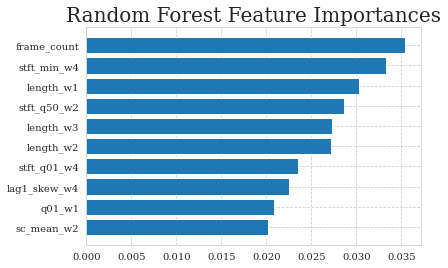

In [25]:
nbr_features = 10
tree_feature_importances = model_vocal_channel.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_vc_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [31]:
imps, vars_ = feature_importance(model_vocal_channel, df_train_model_vc)

Feature: sc_mean_w2, Importance: 0.02012559570113128
Feature: q01_w1, Importance: 0.020843006833846763
Feature: lag1_skew_w4, Importance: 0.022522093295647864
Feature: stft_q01_w4, Importance: 0.023451195089353623
Feature: length_w2, Importance: 0.027207192260308818
Feature: length_w3, Importance: 0.02731632002758339
Feature: stft_q50_w2, Importance: 0.02864894258087342
Feature: length_w1, Importance: 0.03031574716591688
Feature: stft_min_w4, Importance: 0.033244008946741996
Feature: frame_count, Importance: 0.03542858440931193


In [34]:
X_train_vc_fi = np.array(df_train_model_vc_fi[vars_])
X_test_vc_fi = np.array(df_test_model_vc_fi[vars_])

In [35]:
randomforest_vocal_channel_fi = random_forest(X_train_vc_fi, y_train_vc)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [36]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_vocal_channel_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 0.0013212609025101676, 'min_samples_split': 0.03928095055628569}


In [37]:
model_vocal_channel_fi = RandomForestClassifier(min_samples_split = 0.03928095055628569, 
                                    min_samples_leaf = 0.0013212609025101676, 
                                    max_features = 'sqrt', 
                                    max_depth = 32,
                                    criterion = 'log_loss'
                                    )
model_vocal_channel_fi.fit(X_train_vc_fi,y_train_vc)

RandomForestClassifier(criterion='log_loss', max_depth=32,
                       min_samples_leaf=0.0013212609025101676,
                       min_samples_split=0.03928095055628569)

In [38]:
y_pred_rf_vc_fi = model_vocal_channel_fi.predict(X_test_vc_fi)

In [39]:
print(classification_report(y_test_vc, y_pred_rf_vc_fi))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       264
         1.0       0.99      0.91      0.95       360

    accuracy                           0.94       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.94      0.94       624



## Sex

In [40]:
df_train_model_s = df_train.copy()

In [41]:
df_test_model_s = df_test.copy()

In [42]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_s_fi = df_train_model_s.drop("sex", axis=1)
df_train_model_s_fi = pd.get_dummies(df_train_model_s_fi)
df_train_model_s_fi["sex"] = df_train["sex"]
df_train_model_s_fi["sex"] = label_encoder.fit_transform(df_train_model_s_fi['sex'])

In [43]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_s_fi = df_test_model_s.drop("sex", axis=1)
df_test_model_s_fi = pd.get_dummies(df_test_model_s_fi)
df_test_model_s_fi["sex"] = df_test["sex"]
df_test_model_s_fi["sex"] = label_encoder.fit_transform(df_test_model_s_fi['sex'])

In [44]:
X_train_s = df_train_model_s.drop("sex", axis=1)
X_train_s = np.array(pd.get_dummies(X_train_s))
y_train_s = label_Encoder(df_train_model_s["sex"], 'M')

In [45]:
X_test_s = df_test_model_s.drop("sex", axis=1)
X_test_s = np.array(pd.get_dummies(X_test_s))
y_test_s = label_Encoder(df_test_model_s["sex"], 'M')

In [46]:
randomforest_sex = random_forest(X_train_s, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [47]:
print("Tuned Random Forest Parameters: {}".format(randomforest_sex.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 80, 'max_features': None, 'min_samples_leaf': 0.013275947799821042, 'min_samples_split': 0.02243106610904931}


In [48]:
model_sex = RandomForestClassifier(min_samples_split = 0.02243106610904931, 
                                    min_samples_leaf = 0.013275947799821042, 
                                    max_features = None, 
                                    max_depth = 80,
                                   criterion = 'gini'
                                   )
model_sex.fit(X_train_s,y_train_s)

RandomForestClassifier(max_depth=80, max_features=None,
                       min_samples_leaf=0.013275947799821042,
                       min_samples_split=0.02243106610904931)

In [49]:
y_pred_rf_s = model_sex.predict(X_test_s)

In [50]:
print(classification_report(y_test_s, y_pred_rf_s))

              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79       312
         1.0       0.75      0.99      0.85       312

    accuracy                           0.83       624
   macro avg       0.87      0.83      0.82       624
weighted avg       0.87      0.83      0.82       624



In [51]:
accuracy_s = accuracy_score(y_test_s, y_pred_rf_s)
f1_score_s = f1_score(y_test_s, y_pred_rf_s, average = 'weighted')

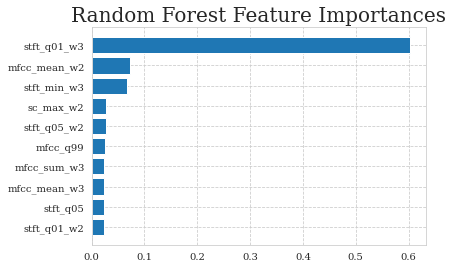

In [52]:
nbr_features = 10
tree_feature_importances = model_sex.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_s_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [78]:
imps_s, vars_s = feature_importance(model_sex, df_train_model_s_fi)

Feature: stft_q01_w2, Importance: 0.024113982231367587
Feature: stft_q05, Importance: 0.02419864039292833
Feature: mfcc_mean_w3, Importance: 0.024354767220603913
Feature: mfcc_sum_w3, Importance: 0.02438964764533788
Feature: mfcc_q99, Importance: 0.025100682871504566
Feature: stft_q05_w2, Importance: 0.026568823628983846
Feature: sc_max_w2, Importance: 0.027346280715680005
Feature: stft_min_w3, Importance: 0.06759019576379542
Feature: mfcc_mean_w2, Importance: 0.07282658742228648
Feature: stft_q01_w3, Importance: 0.6034928925042794


In [55]:
X_train_s_fi = np.array(df_train_model_s_fi[vars_s])
X_test_s_fi = np.array(df_test_model_s_fi[vars_s])

In [56]:
randomforest_sex_fi = random_forest(X_train_s_fi, y_train_s)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [57]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_sex_fi.best_params_))




Tuned Random Forest Parameters after Feature Importance: {'criterion': 'gini', 'max_depth': 89, 'max_features': 'log2', 'min_samples_leaf': 0.0060756113178670685, 'min_samples_split': 0.022739550148113703}


In [58]:
model_sex_fi = RandomForestClassifier(min_samples_split = 0.022739550148113703, 
                                    min_samples_leaf = 0.0060756113178670685, 
                                    max_features = 'log2', 
                                    max_depth = 89, 
                                    criterion = 'gini'
                                    )
model_sex_fi.fit(X_train_s_fi,y_train_s)

RandomForestClassifier(max_depth=89, max_features='log2',
                       min_samples_leaf=0.0060756113178670685,
                       min_samples_split=0.022739550148113703)

In [59]:
y_pred_rf_s_fi = model_sex_fi.predict(X_test_s_fi)

In [60]:
print(classification_report(y_test_s, y_pred_rf_s_fi))

              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84       312
         1.0       0.79      0.99      0.88       312

    accuracy                           0.86       624
   macro avg       0.89      0.86      0.86       624
weighted avg       0.89      0.86      0.86       624



## Emotional Intensity

In [61]:
df_train_model_ei = df_train.copy()

In [62]:
df_test_model_ei = df_test.copy()

In [63]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_ei_fi = df_train_model_ei.drop("emotional_intensity", axis=1)
df_train_model_ei_fi = pd.get_dummies(df_train_model_ei_fi)
df_train_model_ei_fi["emotional_intensity"] = df_train["emotional_intensity"]
df_train_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_train_model_ei_fi['emotional_intensity'])

In [64]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_ei_fi = df_test_model_ei.drop("emotional_intensity", axis=1)
df_test_model_ei_fi = pd.get_dummies(df_test_model_ei_fi)
df_test_model_ei_fi["emotional_intensity"] = df_test["emotional_intensity"]
df_test_model_ei_fi["emotional_intensity"] = label_encoder.fit_transform(df_test_model_ei_fi['emotional_intensity'])

In [65]:
X_train_ei = df_train_model_ei.drop("emotional_intensity", axis=1)
X_train_ei = np.array(pd.get_dummies(X_train_ei))
y_train_ei = label_Encoder(df_train_model_ei["emotional_intensity"], 'normal')

In [66]:
X_train_ei.shape

(1828, 392)

In [67]:
X_test_ei = df_test_model_ei.drop("emotional_intensity", axis=1)
X_test_ei = np.array(pd.get_dummies(X_test_ei))
y_test_ei = label_Encoder(df_test_model_ei["emotional_intensity"], 'normal')

In [68]:
randomforest_emotional_intensity = random_forest(X_train_ei, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [69]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotional_intensity.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 132, 'max_features': None, 'min_samples_leaf': 0.02905679491363522, 'min_samples_split': 0.02950147423971248}


In [70]:
model_emotional_intensity = RandomForestClassifier(min_samples_split = 0.02950147423971248, 
                                    min_samples_leaf = 0.02905679491363522, 
                                    max_features = None, 
                                    max_depth = 132,
                                    criterion = 'entropy'
                                   )
model_emotional_intensity.fit(X_train_ei,y_train_ei)

RandomForestClassifier(criterion='entropy', max_depth=132, max_features=None,
                       min_samples_leaf=0.02905679491363522,
                       min_samples_split=0.02950147423971248)

In [71]:
y_pred_rf_ei = model_emotional_intensity.predict(X_test_ei)

In [72]:
print(classification_report(y_test_ei, y_pred_rf_ei))

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71       288
         1.0       0.76      0.74      0.75       336

    accuracy                           0.73       624
   macro avg       0.73      0.73      0.73       624
weighted avg       0.73      0.73      0.73       624



In [73]:
accuracy_ei = accuracy_score(y_test_ei, y_pred_rf_ei)
f1_score_ei = f1_score(y_test_ei, y_pred_rf_ei, average = 'weighted')

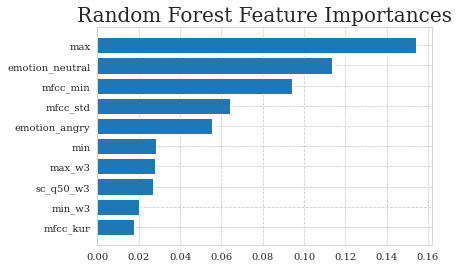

In [74]:
nbr_features = 10
tree_feature_importances = model_emotional_intensity.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [77]:
imps_ei, vars_ei = feature_importance(model_emotional_intensity, df_train_model_ei_fi)

Feature: mfcc_kur, Importance: 0.017475607936111956
Feature: min_w3, Importance: 0.020157966371677723
Feature: sc_q50_w3, Importance: 0.027072521054046325
Feature: max_w3, Importance: 0.02791083386090428
Feature: min, Importance: 0.028430638489440278
Feature: emotion_angry, Importance: 0.0552171307796946
Feature: mfcc_std, Importance: 0.06427802530117219
Feature: mfcc_min, Importance: 0.09442078897060764
Feature: emotion_neutral, Importance: 0.11346992015327517
Feature: max, Importance: 0.15435453184666342


In [79]:
X_train_ei_fi = np.array(df_train_model_ei_fi[vars_ei])
X_test_ei_fi = np.array(df_test_model_ei_fi[vars_ei])

In [80]:
randomforest_emotional_intensity_fi = random_forest(X_train_ei_fi, y_train_ei)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [81]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotional_intensity_fi.best_params_))



Tuned Random Forest Parameters after Feature Importance: {'criterion': 'gini', 'max_depth': 149, 'max_features': None, 'min_samples_leaf': 0.014242437569569465, 'min_samples_split': 0.1520079123642632}


In [82]:
model_emotional_intensity_fi = RandomForestClassifier( 
                                    min_samples_split = 0.1520079123642632, 
                                    min_samples_leaf = 0.014242437569569465, 
                                    max_features = None, 
                                    max_depth = 149,
                                    criterion = 'gini'
                                    )
model_emotional_intensity_fi.fit(X_train_ei_fi,y_train_ei)

RandomForestClassifier(max_depth=149, max_features=None,
                       min_samples_leaf=0.014242437569569465,
                       min_samples_split=0.1520079123642632)

In [83]:
y_pred_rf_ei_fi = model_emotional_intensity_fi.predict(X_test_ei_fi)

In [84]:
print(classification_report(y_test_ei, y_pred_rf_ei_fi))

              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69       288
         1.0       0.74      0.63      0.68       336

    accuracy                           0.69       624
   macro avg       0.69      0.69      0.69       624
weighted avg       0.69      0.69      0.69       624



## Emotion

In [85]:
def label_encoder_e(array):
    new_array = np.zeros(len(array))
    for i in range(len(array)):
        if array[i] == "calm":
            new_array[i] = 1
        elif array[i] == "happy":
            new_array[i] = 2
        elif array[i] == "sad":
            new_array[i] = 3
        elif array[i] == "angry":
            new_array[i] = 4
        elif array[i] == "fearful":
            new_array[i] = 5
        elif array[i] == "disgust":
            new_array[i] = 6
        elif array[i] == "surprised":
            new_array[i] = 7
    return new_array

In [86]:
df_train_model_e = df_train.copy()

In [87]:
df_test_model_e = df_test.copy()

In [88]:
label_encoder = preprocessing.LabelEncoder()
df_train_model_e_fi = df_train_model_e.drop("emotion", axis=1)
df_train_model_e_fi = pd.get_dummies(df_train_model_e_fi)
df_train_model_e_fi["emotion"] = df_train["emotion"]
df_train_model_e_fi["emotion"] = label_encoder.fit_transform(df_train_model_e_fi['emotion'])

In [89]:
label_encoder = preprocessing.LabelEncoder()
df_test_model_e_fi = df_test_model_e.drop("emotion", axis=1)
df_test_model_e_fi = pd.get_dummies(df_test_model_e_fi)
df_test_model_e_fi["emotion"] = df_test["emotion"]
df_test_model_e_fi["emotion"] = label_encoder.fit_transform(df_test_model_e_fi['emotion'])

In [90]:
X_train_e = df_train_model_e.drop("emotion", axis=1)
X_train_e = np.array(pd.get_dummies(X_train_e))
y_train_e = label_encoder_e(df_train_model_e["emotion"])

In [91]:
X_test_e = df_test_model_e.drop("emotion", axis=1)
X_test_e = np.array(pd.get_dummies(X_test_e))
y_test_e = label_encoder_e(df_test_model_ei["emotion"])

In [92]:
randomforest_emotion = random_forest(X_train_e, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [93]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion.best_params_))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 61, 'max_features': 'sqrt', 'min_samples_leaf': 0.005694892821722552, 'min_samples_split': 0.02164909201255923}


In [94]:
model_emotion = RandomForestClassifier(min_samples_split = 0.02164909201255923, 
                                    min_samples_leaf = 0.005694892821722552, 
                                    max_features = 'sqrt', 
                                    max_depth = 61,
                                    criterion = 'entropy'  
                                    )
model_emotion.fit(X_train_e,y_train_e)

RandomForestClassifier(criterion='entropy', max_depth=61,
                       min_samples_leaf=0.005694892821722552,
                       min_samples_split=0.02164909201255923)

In [95]:
y_pred_rf_e = model_emotion.predict(X_test_e)

In [96]:
print(classification_report(y_test_e, y_pred_rf_e))

              precision    recall  f1-score   support

         0.0       0.53      0.19      0.28        48
         1.0       0.45      0.73      0.56        96
         2.0       0.34      0.36      0.35        96
         3.0       0.19      0.06      0.09        96
         4.0       0.42      0.81      0.56        96
         5.0       0.58      0.23      0.33        96
         6.0       0.48      0.42      0.44        48
         7.0       0.40      0.44      0.42        48

    accuracy                           0.42       624
   macro avg       0.42      0.40      0.38       624
weighted avg       0.41      0.42      0.38       624



In [97]:
accuracy_e = accuracy_score(y_test_e, y_pred_rf_e)
f1_score_e = f1_score(y_test_e, y_pred_rf_e, average = 'weighted')

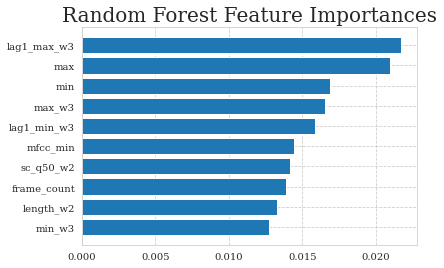

In [98]:
nbr_features = 10
tree_feature_importances = model_emotion.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_e_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [99]:
imps_e, vars_e = feature_importance(model_emotion, df_train_model_e_fi)

Feature: min_w3, Importance: 0.012732541349639385
Feature: length_w2, Importance: 0.013268593498232933
Feature: frame_count, Importance: 0.013900539905652008
Feature: sc_q50_w2, Importance: 0.014202874162640424
Feature: mfcc_min, Importance: 0.014458715723004754
Feature: lag1_min_w3, Importance: 0.015849494817047283
Feature: max_w3, Importance: 0.016576864549500293
Feature: min, Importance: 0.016884185700532947
Feature: max, Importance: 0.02097515613757242
Feature: lag1_max_w3, Importance: 0.021728630737244913


In [100]:
X_train_e_fi = np.array(df_train_model_e_fi[vars_e])
X_test_e_fi = np.array(df_test_model_e_fi[vars_e])

In [101]:
randomforest_emotion_fi = random_forest(X_train_e_fi, y_train_e)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [102]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_fi.best_params_))


Tuned Random Forest Parameters after Feature Importance: {'criterion': 'gini', 'max_depth': 143, 'max_features': None, 'min_samples_leaf': 0.020839412203168917, 'min_samples_split': 0.012555552023070793}


In [103]:
model_emotion_fi = RandomForestClassifier(min_samples_split = 0.012555552023070793, 
                                    min_samples_leaf = 0.020839412203168917, 
                                    max_features = None, 
                                    max_depth = 143, 
                                    criterion = 'gini'
                                    )
model_emotion_fi.fit(X_train_e_fi,y_train_e)

RandomForestClassifier(max_depth=143, max_features=None,
                       min_samples_leaf=0.020839412203168917,
                       min_samples_split=0.012555552023070793)

In [104]:
y_pred_rf_e_fi = model_emotion_fi.predict(X_test_e_fi)

In [105]:
print(classification_report(y_test_e, y_pred_rf_e_fi))

              precision    recall  f1-score   support

         0.0       0.37      0.31      0.34        48
         1.0       0.51      0.69      0.58        96
         2.0       0.30      0.64      0.41        96
         3.0       0.37      0.16      0.22        96
         4.0       0.57      0.64      0.60        96
         5.0       0.26      0.10      0.15        96
         6.0       0.44      0.31      0.37        48
         7.0       0.45      0.27      0.34        48

    accuracy                           0.41       624
   macro avg       0.41      0.39      0.38       624
weighted avg       0.40      0.41      0.38       624



## Some emotions

In [142]:
df_train_model_es = df_train.copy()

In [143]:
df_test_model_es = df_test.copy()

In [144]:
df_train_subset = df_train_model_es[(df_train_model_es["emotion"] == 'happy')] 
df_train_subset1 = df_train_model_es[(df_train_model_es["emotion"] == 'sad')]
df_train_subset_e = pd.concat([df_train_subset, df_train_subset1])

In [145]:
label_encoder_es = preprocessing.LabelEncoder()
X_train_es = df_train_subset_e.drop("emotion", axis=1)
X_train_es = np.array(pd.get_dummies(X_train_es))
y_train_es = label_encoder_es.fit_transform(df_train_subset_e['emotion'])

In [146]:
df_test_subset = df_test_model_es[(df_test_model_es["emotion"] == 'happy')] 
df_test_subset1 = df_test_model_es[(df_test_model_es["emotion"] == 'sad')]
df_test_subset_e = pd.concat([df_test_subset, df_test_subset1])

In [147]:
X_test_es = df_test_subset_e.drop("emotion", axis=1)
X_test_es = np.array(pd.get_dummies(X_test_es))
y_test_es = label_encoder_es.fit_transform(df_test_subset_e["emotion"])

In [148]:
randomforest_emotion_subset = random_forest(X_train_es, y_train_es)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [149]:
print("Tuned Random Forest Parameters: {}".format(randomforest_emotion_subset.best_params_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 51, 'max_features': 'sqrt', 'min_samples_leaf': 0.035617155896520834, 'min_samples_split': 0.04752061629334791}


In [150]:
model_emotion_subset = RandomForestClassifier(min_samples_split = 0.04752061629334791, 
                                    min_samples_leaf = 0.035617155896520834, 
                                    max_features = 'sqrt', 
                                    max_depth = 51, 
                                    criterion = 'gini'
                                    )
model_emotion_subset.fit(X_train_es,y_train_es)

RandomForestClassifier(max_depth=51, min_samples_leaf=0.035617155896520834,
                       min_samples_split=0.04752061629334791)

In [151]:
y_pred_rf_es = model_emotion_subset.predict(X_test_es)

In [152]:
print(classification_report(y_test_es, y_pred_rf_es))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        96
           1       0.82      0.73      0.77        96

    accuracy                           0.79       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.79      0.79      0.79       192



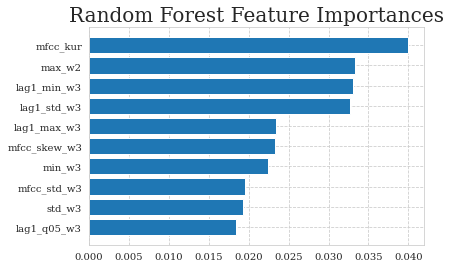

In [202]:
nbr_features = 10
tree_feature_importances = model_emotion_subset.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_train_model_ei_fi.columns)[sorted_idx])
plt.title("Random Forest Feature Importances")
plt.show()

In [154]:
X_train_es_fi = np.array(df_train_subset_e[vars_es])
X_test_es_fi = np.array(df_test_subset_e[vars_es])

In [155]:
randomforest_emotion_subset_fi = random_forest(X_train_es_fi, y_train_es)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [156]:
print("Tuned Random Forest Parameters after Feature Importance: {}".format(randomforest_emotion_subset_fi.best_params_))





Tuned Random Forest Parameters after Feature Importance: {'criterion': 'log_loss', 'max_depth': 158, 'max_features': 'sqrt', 'min_samples_leaf': 0.10747798883573778, 'min_samples_split': 0.6423103557190397}


In [157]:
model_emotion_subset_fi = RandomForestClassifier(min_samples_split = 0.6423103557190397, 
                                    min_samples_leaf = 0.10747798883573778, 
                                    max_features = 'sqrt', 
                                    max_depth = 158,
                                    criterion = 'log_loss'
                                    )
model_emotion_subset_fi.fit(X_train_es_fi,y_train_es)

RandomForestClassifier(criterion='log_loss', max_depth=158,
                       min_samples_leaf=0.10747798883573778,
                       min_samples_split=0.6423103557190397)

In [158]:
y_pred_rf_es_fi = model_emotion_subset_fi.predict(X_test_es_fi)

In [159]:
print(classification_report(y_test_es, y_pred_rf_es_fi))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        96
           1       0.76      0.74      0.75        96

    accuracy                           0.76       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.76      0.76      0.76       192



In [106]:
# vocal_channel

vocal_channel_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
vocal_channel_metrics_b.loc["Accuracy"] = [None, None, None, None]
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
vocal_channel_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [107]:
vocal_channel_metrics_b.loc["Accuracy"][1] = accuracy_vc
vocal_channel_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_vc

In [121]:
vocal_channel_metrics_b.to_csv('vocal_channel_metric.csv', index = False)

In [168]:
y_score = model_vocal_channel.predict_proba(X_test_vc)
fpr, tpr, _ = roc_curve(y_test_vc, y_score[:,1],pos_label=1)
roc_auc = auc(fpr, tpr)

In [169]:
vocal_channel_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
vocal_channel_roc_b.loc["fpr"] = [None, None, None, None]
vocal_channel_roc_b.loc["tpr"] = [None, None, None, None]
vocal_channel_roc_b.loc["auc"] = [None, None, None, None]
vocal_channel_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [170]:
vocal_channel_roc_b.loc["fpr"][1] = fpr
vocal_channel_roc_b.loc["tpr"][1] = tpr
vocal_channel_roc_b.loc["auc"][1] = roc_auc

In [171]:
vocal_channel_roc_b.to_csv('vocal_channel_score.csv', index=False)

In [124]:
# sex

sex_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
sex_metrics_b.loc["Accuracy"] = [None, None, None, None]
sex_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
sex_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [125]:
sex_metrics_b.loc["Accuracy"][1] = accuracy_s
sex_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_s

In [126]:
sex_metrics_b.to_csv('sex_metric.csv', index = False)

In [172]:
y_score_s = model_sex.predict_proba(X_test_s)
fpr_s, tpr_s, _ = roc_curve(y_test_s, y_score_s[:, 1], pos_label=1)
roc_auc_s = auc(fpr_s, tpr_s)

In [173]:
sex_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
sex_roc_b.loc["fpr"] = [None, None, None, None]
sex_roc_b.loc["tpr"] = [None, None, None, None]
sex_roc_b.loc["auc"] = [None, None, None, None]
sex_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [174]:
sex_roc_b.loc["fpr"][1] = fpr
sex_roc_b.loc["tpr"][1] = tpr
sex_roc_b.loc["auc"][1] = roc_auc

In [175]:
sex_roc_b.to_csv('sex_score.csv', index=False)

In [148]:
# emotional_intensity

emotional_intensity_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotional_intensity_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotional_intensity_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [149]:
emotional_intensity_metrics_b.loc["Accuracy"][1] = accuracy_ei
emotional_intensity_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_ei

In [150]:
emotional_intensity_metrics_b.to_csv('emotional_intensity_metrics.csv', index=False)

In [176]:
y_score_ei = model_emotional_intensity.predict_proba(X_test_ei)
fpr_ei, tpr_ei, _ = roc_curve(y_test_ei, y_score_ei[:, 1], pos_label = 1)
roc_auc_ei = auc(fpr_ei, tpr_ei)

In [177]:
# emotional_intensity

emotional_intensity_roc_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["fpr", "tpr", "auc"])
emotional_intensity_roc_b.loc["fpr"] = [None, None, None, None]
emotional_intensity_roc_b.loc["tpr"] = [None, None, None, None]
emotional_intensity_roc_b.loc["auc"] = [None, None, None, None]
emotional_intensity_roc_b

,LG,RF,DTB,AB
fpr,None,None,None,None
tpr,None,None,None,None
auc,None,None,None,None


In [178]:
emotional_intensity_roc_b.loc["fpr"][1] = fpr_ei
emotional_intensity_roc_b.loc["tpr"][1] = tpr_ei
emotional_intensity_roc_b.loc["auc"][1] = roc_auc_ei

In [179]:
emotional_intensity_roc_b.to_csv('emotional_intensity_scores.csv', index=False)

In [156]:
# emotion

emotion_metrics_b = pd.DataFrame(columns=["LG", "RF", "DTB", "AB"], 
                       index=["Accuracy", "F1-Score (Weighted-Average)"])
emotion_metrics_b.loc["Accuracy"] = [None, None, None, None]
emotion_metrics_b.loc["F1-Score (Weighted-Average)"] = [None, None, None, None]
emotion_metrics_b

,LG,RF,DTB,AB
Accuracy,None,None,None,None
F1-Score (Weighted-Average),None,None,None,None


In [157]:
emotion_metrics_b.loc["Accuracy"][1] = accuracy_e
emotion_metrics_b.loc["F1-Score (Weighted-Average)"][1] = f1_score_e

In [159]:
emotion_metrics_b.to_csv('emotion_metrics.csv', index=False)